In [14]:
!pip install polygon-api-client
from polygon import RESTClient 
from local_settings import polygon as settings
from datetime import date, datetime, timedelta
import time
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
client = RESTClient(settings['api_key'])
client2 = RESTClient('nZ0M22W5Fw0pWYfDm6py6fRJBic4BIHs')

In [41]:
stockTicker = 'MSFT'
dataRequest = client.get_aggs(ticker = stockTicker, multiplier = 1, timespan = 'day', from_ = '2021-07-29', to = '2023-07-29')

In [7]:
priceData = pd.DataFrame(dataRequest)

In [8]:
priceData['Date'] = priceData['timestamp'].apply(
                          lambda x: pd.to_datetime(x*1000000))

priceData = priceData.set_index('Date')

In [24]:
fig = go.Figure(data=[go.Candlestick(x=priceData.index,
                open=priceData['open'],
                high=priceData['high'],
                low=priceData['low'],
                close=priceData['close'])])


plot(fig, auto_open=True)

'temp-plot.html'

In [16]:
import pandas as PD
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib. dates as mandates
from sklearn import *
from keras import *

In [9]:
priceData

,open,high,low,close,volume,vwap,timestamp,transactions,otc
Date,,,,,,,,,
2021-08-06 04:00:00,288.505,289.50,287.6238,289.46,16589336.0,288.8028,1628222400000,175525,None
2021-08-09 04:00:00,289.750,291.55,287.8100,288.33,16117629.0,288.6941,1628481600000,189324,None
2021-08-10 04:00:00,288.800,289.25,285.2000,286.44,18616578.0,286.8988,1628568000000,211784,None
2021-08-11 04:00:00,287.210,288.66,285.8600,286.95,13955934.0,286.9447,1628654400000,189792,None
2021-08-12 04:00:00,286.630,289.97,286.3400,289.81,14570391.0,289.0645,1628740800000,174282,None
...,...,...,...,...,...,...,...,...,...
2023-07-24 04:00:00,345.850,346.92,342.3100,345.11,26724646.0,344.8138,1690171200000,387230,None
2023-07-25 04:00:00,347.110,351.89,345.0700,350.98,41614439.0,348.2785,1690257600000,622408,None
2023-07-26 04:00:00,341.440,344.67,333.1100,337.77,58383702.0,337.2226,1690344000000,990567,None


In [11]:
aggs = []
for i in range(2, 0, -1):
    start_date = (datetime.now() - timedelta(days=i * 365)).strftime("%Y-%m-%d")
    end_date = (datetime.now() - timedelta(days=(i-1) * 365)).strftime("%Y-%m-%d")

    for agg in client.list_aggs("MSFT", 1, 'minute', start_date, end_date, limit=50000):
        aggs.append(agg)
    
    if i > 1:
        print("Waiting 60 seconds to avoid reaching the 5 calls/min...")
        time.sleep(60)
df_data = pd.DataFrame.from_dict(aggs)
df_data['date'] = pd.to_datetime(df_data['timestamp'], unit='ms')
df_data = df_data[['date', 'open', 'high', 'low', 'close', 'volume']]

Waiting 60 seconds to avoid reaching the 5 calls/min...


In [44]:
df_data.head(50)

,date,open,high,low,close,volume
0,2021-08-06 08:00:00,289.80,289.80,289.62,289.62,2203.0
1,2021-08-06 08:03:00,289.50,289.50,289.50,289.50,236.0
2,2021-08-06 08:04:00,289.53,289.53,289.52,289.52,400.0
3,2021-08-06 08:05:00,289.53,289.53,289.53,289.53,179.0
4,2021-08-06 08:07:00,289.51,289.51,289.50,289.50,1388.0
5,2021-08-06 08:09:00,289.50,289.50,289.50,289.50,494.0
6,2021-08-06 08:14:00,289.50,289.70,289.50,289.70,2821.0
7,2021-08-06 08:18:00,289.69,289.69,289.69,289.69,236.0
8,2021-08-06 08:21:00,289.70,289.70,289.70,289.70,664.0
9,2021-08-06 08:26:00,289.79,289.79,289.79,289.79,170.0


In [18]:
from sklearn.preprocessing import MinMaxScaler
features = ["open", "high", "low", "volume"]
predict = df_data["close"]
sc = MinMaxScaler()
transform = sc.fit_transform(df_data[features])
transform = pd.DataFrame(columns=features, data=transform, index=df_data.index)

In [20]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=25)
for train_index, test_index in timesplit.split(transform):
        X_train, X_test = transform[:len(train_index)], transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = predict[:len(train_index)].values.ravel(), predict[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [21]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [38]:
y_test

array([339.66, 339.68, 339.72, ..., 327.65, 327.7 , 327.78])

In [66]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


In [67]:
mdl=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
37965/37965 [==============================] - 95s 2ms/step - loss: 2243.6399
Epoch 2/100
37965/37965 [==============================] - 93s 2ms/step - loss: 1.2559
Epoch 3/100
37965/37965 [==============================] - 92s 2ms/step - loss: 0.1847
Epoch 4/100
37378/37965 [============================>.] - ETA: 1s - loss: 0.0417

KeyboardInterrupt: 

In [69]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(1, trainX.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
9492/9492 [==============================] - 87s 8ms/step - loss: 21216.1680
Epoch 2/100
9492/9492 [==============================] - 76s 8ms/step - loss: 625.1686
Epoch 3/100
9492/9492 [==============================] - 74s 8ms/step - loss: 387.1122
Epoch 4/100
9492/9492 [==============================] - 76s 8ms/step - loss: 373.5490
Epoch 5/100
9492/9492 [==============================] - 79s 8ms/step - loss: 362.2061
Epoch 6/100
9492/9492 [==============================] - 77s 8ms/step - loss: 353.1402
Epoch 7/100
9492/9492 [==============================] - 79s 8ms/step - loss: 344.3126
Epoch 8/100
9492/9492 [==============================] - 78s 8ms/step - loss: 335.3394
Epoch 9/100
9492/9492 [==============================] - 79s 8ms/step - loss: 327.7176
Epoch 10/100
9492/9492 [==============================] - 89s 9ms/step - loss: 319.1415
Epoch 11/100
9492/9492 [==============================] - 82s 9ms/step - loss: 310.9720
Epoch 12/100
9492/9492 [===============

In [71]:
import joblib
filename = "polygon_model.joblib"
joblib.dump(model, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...layers\lstm_3
......vars
...layers\lstm_3\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
..

['polygon_model.joblib']

In [72]:
y_pred = model.predict(X_test)

380/380 [==============================] - 2s 2ms/step


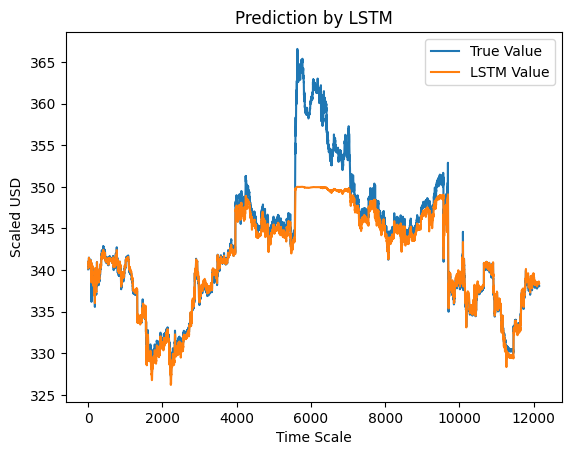

In [76]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [75]:
X_test

array([[[8.26864796e-01, 8.25950812e-01, 8.30559168e-01, 1.62510451e-04]],

       [[8.29145892e-01, 8.28038359e-01, 8.32899870e-01, 8.92016730e-05]],

       [[8.29080718e-01, 8.27516472e-01, 8.32834850e-01, 2.46227956e-05]],

       ...,

       [[8.14155831e-01, 8.12577468e-01, 8.17945384e-01, 6.13331453e-05]],

       [[8.14416528e-01, 8.12903647e-01, 8.18205462e-01, 1.41469153e-04]],

       [[8.14481702e-01, 8.12903647e-01, 8.18270481e-01, 1.44602963e-04]]])

In [4]:
import joblib
mdl = joblib.load('polygon_model.joblib')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-07-29 19:48:28         4886
metadata.json                                  2023-07-29 19:48:28           64
variables.h5                                   2023-07-29 19:48:28       906968
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...layers\lstm_3
......vars
...layers\lstm_3\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
....